<a href="https://colab.research.google.com/github/AbdelwahedSouiid/Transformers/blob/aymen/sentiment-classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Sentiment Classification on Amazon Product Reviews


## Introduction
This notebook performs sentiment classification on Amazon product reviews using natural language processing techniques. The dataset contains reviews for various products, and the goal is to classify the sentiments as positive, negative, or neutral.


## Data Preparation


The following code downloads the Amazon Product Reviews dataset from Kaggle:


In [ ]:
# !pip install kaggle

In [ ]:
# from google.colab import files
# files.upload()  # Choose your kaggle.json file to upload


Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"aymenmsalmi","key":"ffe2251aa4fd313d1654afdec8753d14"}'}

In [ ]:
# !kaggle datasets download -d arhamrumi/amazon-product-reviews

Dataset URL: https://www.kaggle.com/datasets/arhamrumi/amazon-product-reviews
License(s): CC0-1.0
 83% 95.0M/115M [00:00<00:00, 246MB/s]
100% 115M/115M [00:00<00:00, 230MB/s] 


In [ ]:
# !unzip amazon-product-reviews.zip

Archive:  amazon-product-reviews.zip
  inflating: Reviews.csv             


# Load and Explore Data
First, we will load the dataset and take a quick look at the first few rows.

In [ ]:
import pandas as pd

# Load the dataset (replace 'your_file.csv' with the actual file name)
df = pd.read_csv('/content/Reviews.csv')  # Check the extracted files for the correct filename
df.head()  # Display the first few rows


,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


## Data Preparation

In this section, we prepare the features and target variable for our sentiment classification model. 

- **Features (`X`)**: This variable contains the text of the product reviews, which we will use as input for our model.
- **Target (`y`)**: This variable contains the corresponding sentiment scores for the reviews, which we aim to predict.

We then create a new DataFrame called `new_df` that consolidates the selected features and target variable for easier manipulation and analysis. Below, we display the first few entries of the new DataFrame.


In [ ]:
X = df['Text']  # Feature
y = df['Score']  # Target

# Now X and y contain the features and target variable, respectively
# You can use these to train machine learning models or further process the data.

# Example: Creating a new DataFrame with selected features
new_df = pd.DataFrame({'text': X, 'score': y})
print(new_df.head())

                                                text  score
0  I have bought several of the Vitality canned d...      5
1  Product arrived labeled as Jumbo Salted Peanut...      1
2  This is a confection that has been around a fe...      4
3  If you are looking for the secret ingredient i...      2
4  Great taffy at a great price.  There was a wid...      5


## Sentiment Classification

In this section, we create a new column in the `new_df` DataFrame to classify the sentiment of each product review based on its score. The sentiment classification is as follows:

- **Negative**: Scores of 0, 1, or 2
- **Neutral**: A score of 3
- **Positive**: Scores of 4 or 5

The function `get_sentiment` is applied to the `score` column to generate the corresponding sentiment for each review. Below, we display the updated DataFrame with the new sentiment column.


In [ ]:
# Create a new column for sentiment
def get_sentiment(score):
    if score <= 2:
        return "negative"
    elif score == 3:
        return "neutral"
    else:
        return "positive"

new_df['sentiment'] = new_df['score'].apply(get_sentiment)

# Check the updated DataFrame
print(new_df.head())


                                                text  score sentiment
0  I have bought several of the Vitality canned d...      5  positive
1  Product arrived labeled as Jumbo Salted Peanut...      1  negative
2  This is a confection that has been around a fe...      4  positive
3  If you are looking for the secret ingredient i...      2  negative
4  Great taffy at a great price.  There was a wid...      5  positive


## Sampling from Each Sentiment Class

In this section, we aim to create a balanced dataset by sampling 500 rows from each sentiment class. 

1. **Grouping**: We group the `new_df` DataFrame by the `sentiment` column to separate the reviews into their respective sentiment classes (negative, neutral, and positive).
2. **Sampling**: We then sample 500 rows from each sentiment group using the `sample` function. Setting a `random_state` ensures that the sampling is reproducible.
3. **Resetting the Index**: After sampling, we reset the index of the resulting DataFrame to maintain a clean structure.

Finally, we print the first few rows of the sampled DataFrame to verify the selection.


In [ ]:
# prompt: just select 500 row of each class

# Group the DataFrame by sentiment
grouped = new_df.groupby('sentiment')

# Sample 500 rows from each group
sampled_df = grouped.apply(lambda x: x.sample(n=100, random_state=42))

# Reset the index
sampled_df = sampled_df.reset_index(drop=True)

# Print the first few rows of the sampled DataFrame
print(sampled_df.head())

                                                text  score sentiment
0  I have an absolute passion for deep, dark hot ...      2  negative
1  This drink is so "super energy" it's almost fr...      2  negative
2  I'm sticking with what used to be carnation, n...      2  negative
3  Aspertame causes alot of problems including pr...      1  negative
4  I ordered these because my local pet store sto...      2  negative


<ipython-input-10-b8de1933e459>:7: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  sampled_df = grouped.apply(lambda x: x.sample(n=100, random_state=42))


In [ ]:
new_df = sampled_df

In [ ]:
new_df.shape

(300, 3)

## Methodology
In this notebook, we will utilize a pre-trained transformer model to classify sentiments. We will preprocess the data, tokenize the reviews, and then apply the model to predict sentiments.


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from transformers import AutoTokenizer, AutoModelForSequenceClassification, Trainer, TrainingArguments
import torch


## Data Splitting and Dataset Preparation

In this section, we perform two main tasks:

1. **Splitting the Data**: We split the `new_df` DataFrame into training and testing datasets using an 80-20 split. This allows us to train our model on one portion of the data while reserving another portion for testing its performance.

2. **Defining the Dataset Class**: We define a custom dataset class, `SentimentDataset`, which inherits from `torch.utils.data.Dataset`. This class will help us prepare our data for training in a format that can be easily used with PyTorch. Key components of this class include:
   - **Initialization (`__init__`)**: This method takes a DataFrame and a tokenizer, storing the texts and their corresponding sentiment labels. It encodes the texts using the provided tokenizer.
   - **Getting Items (`__getitem__`)**: This method retrieves the encoded inputs and their corresponding labels for a specific index. The sentiment labels are mapped to integers for model training.
   - **Length of Dataset (`__len__`)**: This method returns the total number of samples in the dataset.

The `SentimentDataset` class will be used to load data efficiently during model training.


In [ ]:
# Split data into train and test
train_df, test_df = train_test_split(new_df, test_size=0.2, random_state=42)

# Define the dataset class
class SentimentDataset(torch.utils.data.Dataset):
    def __init__(self, df, tokenizer):
        self.texts = list(df['text'])
        self.labels = list(df['sentiment'])
        self.encodings = tokenizer(self.texts, truncation=True, padding=True, max_length=256)

    def __getitem__(self, idx):
        item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
        label_mapping = {'negative': 0, 'neutral': 1, 'positive': 2}
        item['labels'] = torch.tensor(label_mapping[self.labels[idx]])
        return item

    def __len__(self):
        return len(self.labels)


## Model Training

In this section, we define the `train_model` function to train a sentiment classification model using different transformer architectures (BERT, RoBERTa, and DistilBERT). 

### Function Overview:
- **Function Name**: `train_model`
- **Parameters**:
  - `model_name`: The name of the pre-trained model to use (e.g., 'bert-base-uncased').
  - `train_dataset`: The training dataset.
  - `test_dataset`: The testing dataset.
  - `epochs`: The number of epochs for training.

### Steps:
1. **Tokenizer Initialization**: We load the appropriate tokenizer for the specified model.
2. **Dataset Creation**: We create instances of `SentimentDataset` for both the training and testing datasets using the loaded tokenizer.
3. **Model Initialization**: We load the pre-trained model for sequence classification, specifying that we have three sentiment labels.
4. **Training Arguments**: We define the training parameters, including the output directory, number of epochs, batch sizes, evaluation strategy, and logging settings.
5. **Trainer Initialization**: We create an instance of the `Trainer` class from the Hugging Face library, which simplifies the training process.
6. **Training Execution**: We call the `train` method on the trainer to start the training process.

Finally, we train the models for BERT, RoBERTa, and DistilBERT using this function.

### Note:
The models will be trained for three epochs each, and the results will be saved in the specified output directories.


In [ ]:
def train_model(model_name, train_dataset, test_dataset, epochs):
    tokenizer = AutoTokenizer.from_pretrained(model_name)
    train_dataset = SentimentDataset(train_df, tokenizer)
    test_dataset = SentimentDataset(test_df, tokenizer)

    model = AutoModelForSequenceClassification.from_pretrained(model_name, num_labels=3)
    training_args = TrainingArguments(
        output_dir=f'./results/{model_name}',
        num_train_epochs=epochs,
        per_device_train_batch_size=8,
        per_device_eval_batch_size=16,
        evaluation_strategy='epoch',
        logging_dir=f'./logs/{model_name}',
        logging_steps=10
    )
    trainer = Trainer(
        model=model,
        args=training_args,
        train_dataset=train_dataset,
        eval_dataset=test_dataset
    )
    trainer.train()
    return model, trainer

# Train BERT, RoBERTa, and DistilBERT
bert_model, bert_trainer = train_model('bert-base-uncased', train_df, test_df, epochs=3)
roberta_model, roberta_trainer = train_model('roberta-base', train_df, test_df, epochs=3)
distilbert_model, distilbert_trainer = train_model('distilbert-base-uncased', train_df, test_df, epochs=3)


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/usr/local/lib/python3.10/dist-packages/transformers/training_args.py:1525: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(
wandb: WARNING The `run_name` is currently set to the same value as `TrainingArguments.output_dir`. If this was not intended, please specify a different run name by setting the `TrainingArguments.run_name` parameter.
wandb: Using wandb-core as the SDK backend. Please refer to https://wandb.me/wandb-core for more information.


<IPython.core.display.Javascript object>

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter, or press ctrl+c to quit:

 ··········


wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


Epoch,Training Loss,Validation Loss
1,1.120300,1.098946
2,0.922600,0.955253
3,0.620500,0.901153


tokenizer_config.json:   0%|          | 0.00/25.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/481 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


model.safetensors:   0%|          | 0.00/499M [00:00<?, ?B/s]

Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at roberta-base and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/usr/local/lib/python3.10/dist-packages/transformers/training_args.py:1525: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(


Epoch,Training Loss,Validation Loss
1,1.042300,0.958860
2,0.782800,0.711145
3,0.366000,0.799030


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/483 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/usr/local/lib/python3.10/dist-packages/transformers/training_args.py:1525: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(


Epoch,Training Loss,Validation Loss
1,1.068900,1.082551
2,0.818900,0.922258
3,0.544700,0.850289


## Model Evaluation

In this section, we evaluate the performance of the trained sentiment classification models (BERT, RoBERTa, and DistilBERT) on the test dataset.

### Function Overview:
- **Function Name**: `evaluate_model`
- **Parameters**:
  - `trainer`: The trained model's trainer instance, which contains the model and its training parameters.
  - `test_dataset`: The dataset on which the model will be evaluated.

### Steps:
1. **Prediction**: We use the `predict` method of the trainer to obtain the model's predictions and true labels for the test dataset.
2. **Post-Processing**: The predictions are converted into class labels using `torch.argmax`, selecting the class with the highest predicted probability.
3. **Accuracy Calculation**: The accuracy of each model is computed by comparing the predicted labels with the true labels using `accuracy_score`.

Finally, we print the accuracy for each model, providing insight into their performance on the sentiment classification task.


In [ ]:
def evaluate_model(trainer, test_dataset):
    predictions, labels, _ = trainer.predict(test_dataset)
    preds = torch.argmax(torch.tensor(predictions), axis=1)
    return preds, labels

# Evaluate each model
bert_preds, bert_labels = evaluate_model(bert_trainer, SentimentDataset(test_df, AutoTokenizer.from_pretrained('bert-base-uncased')))
roberta_preds, roberta_labels = evaluate_model(roberta_trainer, SentimentDataset(test_df, AutoTokenizer.from_pretrained('roberta-base')))
distilbert_preds, distilbert_labels = evaluate_model(distilbert_trainer, SentimentDataset(test_df, AutoTokenizer.from_pretrained('distilbert-base-uncased')))

# Accuracy for each model
bert_accuracy = accuracy_score(bert_labels, bert_preds)
roberta_accuracy = accuracy_score(roberta_labels, roberta_preds)
distilbert_accuracy = accuracy_score(distilbert_labels, distilbert_preds)

print(f"BERT Accuracy: {bert_accuracy:.2f}")
print(f"RoBERTa Accuracy: {roberta_accuracy:.2f}")
print(f"DistilBERT Accuracy: {distilbert_accuracy:.2f}")


/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


BERT Accuracy: 0.48
RoBERTa Accuracy: 0.72
DistilBERT Accuracy: 0.62


| **Attribute**      | **BERT**                                                 | **RoBERTa**                                              | **DistilBERT**                          |
|--------------------|----------------------------------------------------------|----------------------------------------------------------|-----------------------------------------|
| **Full Name**      | Bidirectional Encoder Representations from Transformers | Robustly Optimized BERT Pretraining Approach             | Distilled BERT                          |
| **Training Speed** | Slow                                | Slower than BERT (more data & epochs)                    | 2x Faster than BERT                     |
| **Training Data**  | Wikipedia + BooksCorpus (16GB)                           | BERT Data + OpenWebText + CC-News + Stories (~160GB)     | Same as BERT with knowledge distillation |
| **Accuracy**       | 0.48                                                     | 0.72                                                     | 0.62                                    |


## Confusion Matrix Visualization

In this section, we visualize the performance of our sentiment classification models using confusion matrices. A confusion matrix provides a comprehensive breakdown of the model's predictions, showing how many instances were correctly and incorrectly classified for each sentiment category.

### Function Overview:
- **Function Name**: `plot_confusion_matrix`
- **Parameters**:
  - `labels`: The true sentiment labels from the test dataset.
  - `preds`: The predicted sentiment labels from the model.
  - `model_name`: A string indicating the name of the model being evaluated (e.g., "BERT").

### Steps:
1. **Confusion Matrix Calculation**: The function calculates the confusion matrix using the `confusion_matrix` function from `sklearn.metrics`.
2. **Visualization**: It then visualizes the confusion matrix as a heatmap using `seaborn`, annotating the cells with the counts of predictions. 
3. **Labels**: The x-tick and y-tick labels are set to represent the three sentiment categories: negative, neutral, and positive.
4. **Plot Display**: Finally, the plot is displayed with appropriate titles and labels.

We plot the confusion matrix for each of the trained models (BERT, RoBERTa, and DistilBERT) to compare their classification performance visually.


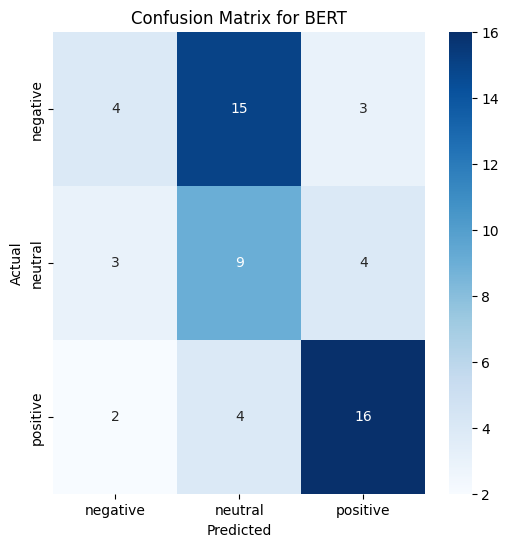

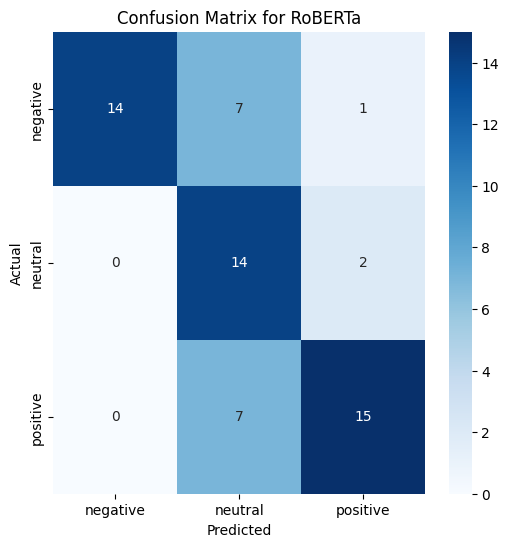

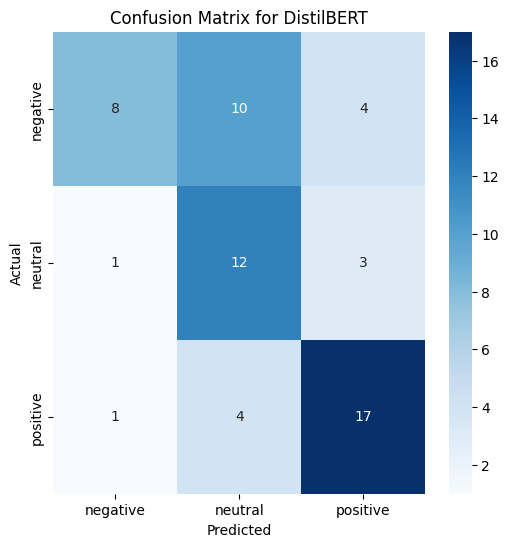

In [ ]:
def plot_confusion_matrix(labels, preds, model_name):
    cm = confusion_matrix(labels, preds)
    plt.figure(figsize=(6, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['negative', 'neutral', 'positive'], yticklabels=['negative', 'neutral', 'positive'])
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title(f"Confusion Matrix for {model_name}")
    plt.show()

# Plot confusion matrix for each model
plot_confusion_matrix(bert_labels, bert_preds, "BERT")
plot_confusion_matrix(roberta_labels, roberta_preds, "RoBERTa")
plot_confusion_matrix(distilbert_labels, distilbert_preds, "DistilBERT")


## Text Summarization

In this section, we initialize a text summarization pipeline using the BART model from Hugging Face's Transformers library. BART (Bidirectional and Auto-Regressive Transformers) is particularly effective for tasks like summarization due to its ability to understand context from both directions.

### Pipeline Initialization:
- **Function**: `pipeline`
- **Task**: The task specified is "summarization".
- **Model**: We use the pre-trained model `facebook/bart-large-cnn`, which is designed for summarizing text. 

Once the pipeline is initialized, we can use it to summarize longer texts efficiently, allowing us to extract concise and meaningful summaries from large datasets or documents.


In [ ]:
import pandas as pd
from transformers import pipeline


In [ ]:
# Initialize summarization pipeline
summarizer = pipeline("summarization", model="facebook/bart-large-cnn")


config.json:   0%|          | 0.00/1.58k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.63G [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/363 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(
Hardware accelerator e.g. GPU is available in the environment, but no `device` argument is passed to the `Pipeline` object. Model will be on CPU.


In [ ]:
# Function to summarize text with control over max and min length of summary
def summarize_text(text):
    return summarizer(text, max_length=50, min_length=20, do_sample=False)[0]['summary_text']

# Apply summarization to each review
new_df['summary'] = new_df['text'].apply(lambda x: summarize_text(x))

# Check the updated DataFrame
print(new_df[['text', 'summary']].head())


Your max_length is set to 50, but your input_length is only 30. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=15)
Your max_length is set to 50, but your input_length is only 40. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=20)
Your max_length is set to 50, but your input_length is only 44. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=22)
Your max_length is set to 50, but your input_length is only 38. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=19)
Your max

                                                text  \
0  I have an absolute passion for deep, dark hot ...   
1  This drink is so "super energy" it's almost fr...   
2  I'm sticking with what used to be carnation, n...   
3  Aspertame causes alot of problems including pr...   
4  I ordered these because my local pet store sto...   

                                             summary  
0  McSteven's Dark Chocolate European Coca Mix fe...  
1  This drink is so "super energy" it's almost fr...  
2  Malt tastes like powdered milk with a hint of ...  
3  Aspertame causes alot of problems including pr...  
4  I bought 2 pkgs.  One Pumpkin & one Blueberry....  


In [ ]:
pd.set_option('display.max_colwidth', None)

In [ ]:
# Get the specific item from the DataFrame
item = new_df[['text', 'summary']].iloc[1]

# Print the item with left alignment
print(f"text:\n{item['text']}\n")
print(f"summary:\n{item['summary']}\n")


text:
This drink is so "super energy" it's almost frightening.  Several members of my family tasted it and the consensus was that it might, indeed, give you a boost but the taste...some even compared it to grapefruit juice...was  definitely not good.

summary:
This drink is so "super energy" it's almost frightening. Several members of my family tasted it and the consensus was that it might, indeed, give you a boost but the taste...was  definitely not good.



In [ ]:
# Set display options to show all text in the DataFrame
pd.set_option('display.max_colwidth', None)  # This allows the full text to be displayed

# Print the DataFrame to see all text and summaries
print(new_df[['text', 'summary']].head())


                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                      text  \
0                                   I have an absolute passion for deep, dark hot chocolate. I want chocolate which tastes like *chocolate*, rich and flavorful, with a hint of a bite. You can savor chocolate like that.<br />What I have an aversion to is hot sugar. And, most hot mixes taste just like that; you might as well suck on a cube of sugar with a sprinkling of coca on 